## plots_sim

This jn is intended to summarize the simulations, gathering all information about simulations and showing as plots.

All the parameters are listed in a JSON file in the same folder as this jupyter notebook.

In [1]:
import numpy as np
from pathlib import Path
import healpy as hp
import json, os, sys, glob
from time import sleep
import tabulate
from ga_sim.plot import (
    general_plots,
    plot_ftp,
    plots_ang_size,
    plot_err,
    plot_clusters_clean,
    plot_cmd_clean
)

Below, load the JSON config file (change any parameter in case you want) and create folders for results.

Load the maps for reddening.

In [2]:
confg = "ga_sim.json"

with open(confg) as fstream:
    param = json.load(fstream)

## Plots

### Table of Simulated Objects

The cell below show the complete table of simulated clusters released in this simulation. An improved description of columns is provided:
<br>
<br>
0-HPX64: Ipix where the cluster is centered (Nested=True, Nside=64);
<br>
1-N: Star counts in cluster (before filtering stars from crowding);
<br>
2-MV: Absolute magnitude in V band (before filtering stars from crowding);
<br>
3-SNR: Poissonian Signal to Noise Ratio of the cluster. This is estimated by star counts within 2 arcmin over
<br>
root square of star counts within an annulus of rin=10 arcmin and rout = 25 arcmin, normalized
<br>
by area. This is calculated before filtering stars from crowding;
<br>
4-N_f: Star counts of filtering in stars by crowding;
<br>
5-MV_f: Absolute magnitude in V band after removing stars by crowding;
<br>
6-SNR_f: Signal to Noise Ratio calculated as described in (3) but after removing stars from crowding;
<br>
7-L: Galactic longitude (l), in degrees;
<br>
8-B: Galactic latitude (b), in degrees;
<br>
9-ra: Right Ascension (Equatorial coordinate), in degrees;
<br>
10-dec: Declination (Equatorial coordinate), in degrees;
<br>
11-r_exp: Exponential radius of cluster, in parsecs;
<br>
12-ell: Ellipticity (a - b) / a;
<br>
13-pa: Angular position (from North to East), in degrees;
<br>
14-mass: Visible mass of cluster (star accounted for mass are stars brighter than the limiting magnitude
<br>
of the simulation), in Solar masses;
<br>
15-dist: distance of the simulated cluster from Sun, in parsecs;

In [3]:
with open(param['star_clusters_simulated']) as f:
    first_line = f.readline()

IPIX_with_clusters = np.loadtxt(param['star_clusters_simulated'], usecols=(0), dtype=int, unpack=True)

table = tabulate.tabulate(np.loadtxt(param['star_clusters_simulated']),
                          tablefmt='html',
                          headers=(first_line[1:].split()))

print('Total of clusters simulated: {:d}\n'.format(len(IPIX_with_clusters)))

table

Total of clusters simulated: 10



0-HPX64,1-N,2-MV,3-SNR,4-N_f,5-MV_f,6-SNR_f,7-L,8-B,9-ra,10-dec,11-r_exp,12-ell,13-pa,14-mass,15-dist
34611,100,-3.76,19.35,83,-3.58,17.11,234.685,-42.9356,67.5,-33.5101,94.81,0.2,3.01,365.97,687560
34612,114,-4.28,20.68,91,-4.04,17.52,234.901,-41.774,68.9062,-33.5101,62.43,0.19,88.61,396.84,685110
34614,112,-2.76,21.73,98,-2.72,19.74,233.837,-42.2534,68.2031,-32.7972,49.01,0.2,114.55,345,399398
34615,92,-3.8,20.65,74,-3.57,18.47,233.023,-41.5573,68.9062,-32.09,45.7,0.06,112.34,330.52,648266
34616,136,-3.43,21.86,118,-3.26,20.36,234.482,-44.0988,66.0937,-33.5101,69.43,0.06,19.31,363.39,450871
34617,144,-3.13,23.02,116,-3.02,20.33,233.608,-43.4235,66.7969,-32.7972,64.08,0.02,129.42,384.15,451289
34619,130,-4.94,21.45,72,-4.23,17.08,232.525,-43.9118,66.0937,-32.09,42.39,0.02,106.09,355.76,967973
34620,141,-4.84,19.14,90,-4.45,14.94,232.768,-42.7337,67.5,-32.09,55.38,0.13,149.14,342.32,874319
34621,113,-4.61,22.58,68,-3.97,17.91,231.961,-42.0303,68.2031,-31.3882,88.72,0.01,134.36,326.95,874165
34622,119,-3.12,18.76,95,-2.88,16.99,231.693,-43.2144,66.7969,-31.3882,76.83,0.07,126.68,395.69,407326


Plot footprint map to check area.

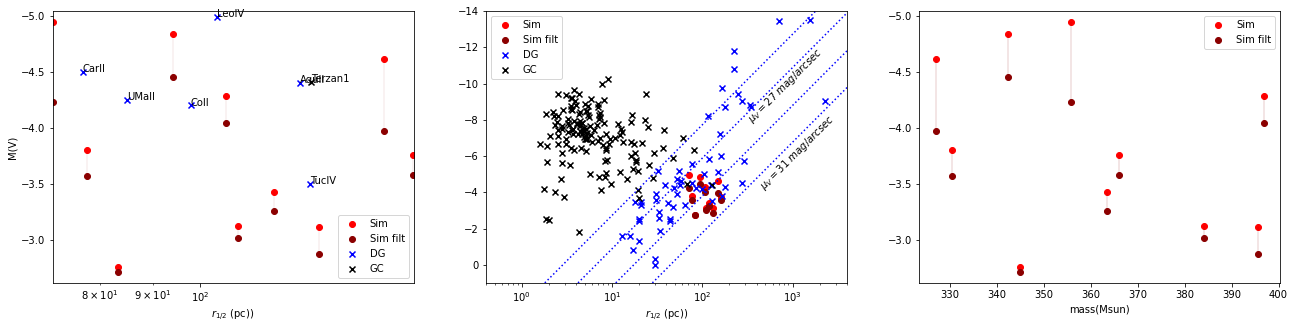

In [4]:
general_plots(param['star_clusters_simulated'], param['output_plots'])

In [ ]:
# Reading [M/H], log_age, mini, g
iso_info = np.loadtxt(param['file_iso'], usecols=(1, 2, 3, 26), unpack=True)
FeH_iso = iso_info[0][0]
logAge_iso = iso_info[1][0]
m_ini_iso = iso_info[2]
g_iso = iso_info[3]

print('[Fe/H]={:.2f}, Age={:.2f} Gyr'.format(FeH_iso, 10**(logAge_iso-9)))

# Diretório onde estão os arquivo _clus.dat
plots_ang_size(param['star_clusters_simulated'], param['results_path'],
               param['mmin'], param['mmax'], param['cmin'], param['cmax'],
               param['output_plots'], FeH_iso)


[Fe/H]=-2.00, Age=13.00 Gyr


In [ ]:
hpx_ftp = param['results_path'] + "/ftp_4096_nest.fits"

plot_ftp(hpx_ftp, param['star_clusters_simulated'],
         param['final_cat'], param['ra_max'], param['ra_min'], param['dec_min'], param['dec_max'], param['output_plots'])


Plotting errors in main magnitude band.

In [ ]:
# Plots to analyze the simulated clusters.
plot_err(param['final_cat'], param['output_plots'])


Plot position of stars in clusters comparing filtered in and not filtered stars. The region sampled is the center of the cluster where the crowding is more intense.

In [ ]:
ipix_cats = [(param['hpx_cats_path'] + '/' + '{:d}'.format(i) + '.fits') for i in IPIX_with_clusters]
ipix_clean_cats = [(param['hpx_cats_clean_path'] + '/' + '{:d}'.format(i) + '.fits') for i in IPIX_with_clusters]
                   
plot_clusters_clean(ipix_cats, ipix_clean_cats, param['nside_ini'], param['ra_str'], param['dec_str'], 0.01, param['output_plots'])


The images below are the plots comparing simulations and real clusters.

In [ ]:
plot_cmd_clean(ipix_clean_cats, param['mmin'], param['mmax'], param['cmin'], param['cmax'],
                    'mag_g_with_err', 'mag_r_with_err', 'GC', param['output_plots'])